In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
import seaborn.objects as so

In [2]:
df = pd.read_csv("simulation_df.csv")

true_ate = 5
df = df.rename(columns={"Unnamed: 0": "instance"})
df = df.assign(ate_error=lambda d: abs(d["ATE"] - true_ate))

df

,instance,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ate_error
0,0,10000.0,0.143369,0.100964,2.084271e-05,0.022032,0.128495,0.286353,0.586956,0.241069,scaled_expit_0.125,0.125,NaN,6.671276,0.361144,1.671276
1,0,10000.0,0.017849,0.013045,2.012828e-06,0.003959,0.016051,0.036187,0.066472,0.217277,scaled_expit_0.125_calibrated,0.125,sigmoid_calib,4.856539,0.312415,0.143461
2,0,10000.0,0.122486,0.085142,7.326419e-06,0.019090,0.110934,0.242946,0.481578,0.233673,scaled_expit_0.25,0.25,NaN,6.340275,0.357344,1.340275
3,0,10000.0,0.017760,0.013215,5.911120e-06,0.003975,0.015677,0.036658,0.067297,0.217285,scaled_expit_0.25_calibrated,0.25,sigmoid_calib,4.861518,0.312395,0.138482
4,0,10000.0,0.108863,0.074971,5.874641e-06,0.017012,0.099281,0.214668,0.414444,0.229602,scaled_expit_0.3333333333333333,0.3333333333333333,NaN,6.140921,0.353901,1.140921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,9,10000.0,0.018341,0.009023,1.288073e-06,0.005074,0.019610,0.027757,0.049282,0.227491,lr_l2_calibrated,lr_l2_model,sigmoid_calib,5.021220,0.363908,0.021220
316,9,10000.0,0.037416,0.023382,1.639011e-05,0.007363,0.035455,0.072772,0.118752,0.230456,GBT_cv,GBT_cv_model,NaN,5.687130,0.377567,0.687130
317,9,10000.0,0.015176,0.010402,6.232941e-08,0.002972,0.012723,0.031727,0.052566,0.229830,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,5.405519,0.368887,0.405519
318,9,10000.0,0.045534,0.029459,1.101059e-05,0.009253,0.042758,0.090801,0.143354,0.230506,rf_cv,rf_cv_model,NaN,5.750339,0.373702,0.750339


In [3]:
fig = plt.figure(layout='constrained', figsize=(16, 6))
subfigs = fig.subfigures(1, 2, wspace=0.07)

<Figure size 1152x432 with 0 Axes>

### Deformation-Recalibration

In [4]:
defrec = df.loc[df["type"].str.startswith("scaled")]
# defrec.assign(scale=lambda d: d["type"].str.split("_").str[2])
defrec = defrec.assign(calibrated=lambda d: d["calibration_type"].notna())
# defrec = defrec.assign(calibrated=lambda d: d["calibrated"].replace(
#     {False: "Pre-calibration", True: "Post-calibration"})
# )
defrec["scale"] = defrec["scale"].astype(float)
defrec = defrec.loc[defrec["scale"] < 3]
defrec

,instance,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ate_error,calibrated
0,0,10000.0,0.143369,0.100964,0.000021,0.022032,0.128495,0.286353,0.586956,0.241069,scaled_expit_0.125,0.125000,NaN,6.671276,0.361144,1.671276,False
1,0,10000.0,0.017849,0.013045,0.000002,0.003959,0.016051,0.036187,0.066472,0.217277,scaled_expit_0.125_calibrated,0.125000,sigmoid_calib,4.856539,0.312415,0.143461,True
2,0,10000.0,0.122486,0.085142,0.000007,0.019090,0.110934,0.242946,0.481578,0.233673,scaled_expit_0.25,0.250000,NaN,6.340275,0.357344,1.340275,False
3,0,10000.0,0.017760,0.013215,0.000006,0.003975,0.015677,0.036658,0.067297,0.217285,scaled_expit_0.25_calibrated,0.250000,sigmoid_calib,4.861518,0.312395,0.138482,True
4,0,10000.0,0.108863,0.074971,0.000006,0.017012,0.099281,0.214668,0.414444,0.229602,scaled_expit_0.3333333333333333,0.333333,NaN,6.140921,0.353901,1.140921,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,9,10000.0,0.023161,0.018395,0.000007,0.006019,0.015136,0.049890,0.081617,0.214362,scaled_expit_1.5_calibrated,1.500000,sigmoid_calib,5.313676,0.351394,0.313676,True
304,9,10000.0,0.051750,0.023247,0.000030,0.015418,0.056648,0.079400,0.099347,0.221196,scaled_expit_1.75,1.750000,NaN,3.833481,0.300070,1.166519,False
305,9,10000.0,0.024105,0.019054,0.000003,0.004725,0.016385,0.051421,0.078974,0.214640,scaled_expit_1.75_calibrated,1.750000,sigmoid_calib,5.334212,0.352171,0.334212,True
306,9,10000.0,0.070243,0.030837,0.000031,0.021357,0.076909,0.105462,0.124299,0.225449,scaled_expit_2,2.000000,NaN,2.904662,0.285298,2.095338,False


In [5]:
def plot_arrows(data, ax, x="mean", y="ate_error"):
    x_tail = data.loc[~data["calibrated"], x]
    y_tail = data.loc[~data["calibrated"], y]
    x_head = data.loc[data["calibrated"], x]
    y_head = data.loc[data["calibrated"], y]
    dx = x_head - x_tail
    dy = y_head - y_tail
    # color = data.loc[data["calibrated"], "scale"]
    color = data.loc[data["calibrated"], "color"]
    for i in range(len(x_tail)):
        arrow = FancyArrowPatch(
            (x_tail.iloc[i], y_tail.iloc[i]), (x_head.iloc[i], y_head.iloc[i]),
            lw=0.5, alpha=0.7, linestyle='solid', 
            edgecolor=color.iloc[i],
            # facecolor="grey",
            facecolor=color.iloc[i],
            arrowstyle='simple,tail_width=0.01', 
            zorder=0,
            shrinkB=3, mutation_scale=15,
        )
        ax.add_patch(arrow)

In [6]:
cmap = sns.diverging_palette(
    240, 50, s=80, l=70,
    n=defrec['scale'].nunique(),
    as_cmap=True, 
    center='light'
)

In [7]:
# fig, ax = plt.subplots(figsize=(8,6))
ax = subfigs[0].subplots()

p = so.Plot(
    data=defrec,
    x="mean",
    y="ate_error",
    color="scale",
    marker="calibrated",
    group="instance",
# ).add(
#     so.Lines(artist_kws={"zorder": 0}, alpha=0.7, linewidth=0.5), legend=False,
).add(
    so.Dot(edgecolor="black", edgewidth=0.5), legend=False,
).scale(
    # x=so.Nominal(order=[False, True]),
    # color=so.Continuous(cmap).tick(at=defrec['scale'].unique()),
    color=so.Continuous(cmap),
    marker=["o", "s"],
).label(
    y="Estimation error",
    x="Calibration error",
    # title="Calibration reduces estimation error",
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
).on(ax).plot()

# Colorbar:
norm = TwoSlopeNorm(1, defrec['scale'].min(), defrec['scale'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
colorbar = fig.colorbar(sm)
# Font sizes:
colorbar.ax.set_ylabel(
    "Calibration Deformation Scale", 
    fontdict={'size': 14}, labelpad=14
)
colorbar.ax.tick_params(axis='y', which='major', labelsize=12)

# Legend:
legend_element = dict(
    xdata=[], ydata=[], linestyle="None", lw=4,
    markerfacecolor='w', markeredgecolor='black', markersize=12, 
)
legend_elements = [
    Line2D(**legend_element, marker='s', label='Uncalibrated'),
    Line2D(**legend_element, marker='o', label='Calibrated'),
]
ax.legend(handles=legend_elements, prop={'size': 12})#,

ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
# Other:
# ax.set_title(
#     "Calibration reduces estimation error", 
#     loc="left", fontsize=16,
# );

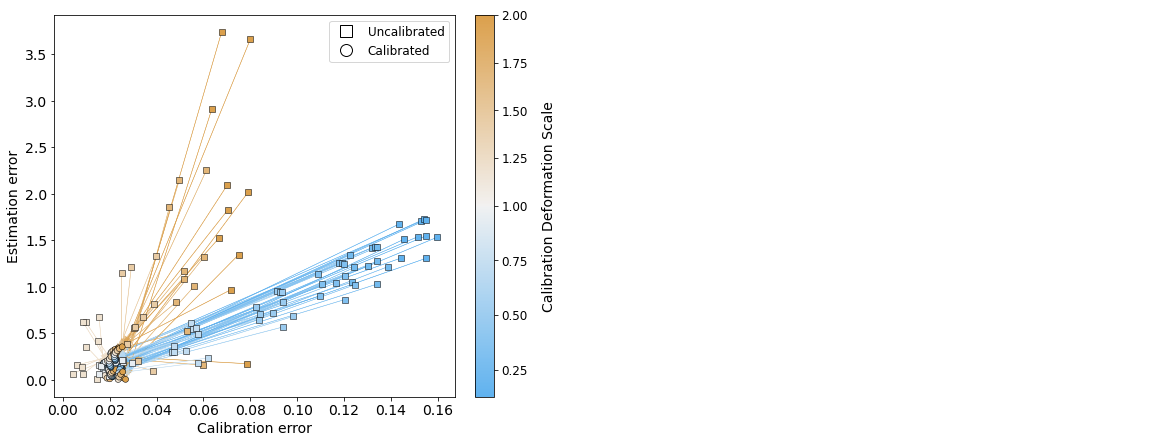

In [8]:
defrec["color"] = [cmap(norm(s))[:3] for s in defrec["scale"]]
plot_arrows(defrec, ax)
fig

In [9]:
defrec["scale"].unique()

array([0.125     , 0.25      , 0.33333333, 0.5       , 0.75      ,
       1.        , 1.25      , 1.5       , 1.75      , 2.        ])

## Models

In [10]:
import inspect

def move_legend_fig_to_ax(fig, ax, loc, bbox_to_anchor=None, **kwargs):
    if fig.legends:
        old_legend = fig.legends[-1]
    else:
        raise ValueError("Figure has no legend attached.")

    old_boxes = old_legend.get_children()[0].get_children()

    legend_kws = inspect.signature(mpl.legend.Legend).parameters
    props = {
        k: v for k, v in old_legend.properties().items() if k in legend_kws
    }

    props.pop("bbox_to_anchor")
    title = props.pop("title")
    if "title" in kwargs:
        title.set_text(kwargs.pop("title"))
    title_kwargs = {k: v for k, v in kwargs.items() if k.startswith("title_")}
    for key, val in title_kwargs.items():
        title.set(**{key[6:]: val})
        kwargs.pop(key)
    kwargs.setdefault("frameon", old_legend.legendPatch.get_visible())

    # Remove the old legend and create the new one
    props.update(kwargs)
    fig.legends = []
    new_legend = ax.legend(
        [], [], loc=loc, bbox_to_anchor=bbox_to_anchor, **props
    )
    new_legend.get_children()[0].get_children().extend(old_boxes)

In [11]:
acic = pd.read_csv("acic_results.csv")
acic = acic.rename(columns={"Unnamed: 0": "instance"})
acic["instance"] = acic["instance"].str.split("_").str[1]
acic["calibrated"] = acic["type"].str.contains("calibrated")
acic = acic.rename(columns={"ATE_error": "ate_error"})
acic = acic.query("scale != 'identity_model'")
acic = acic.assign(model=lambda d: d["scale"].replace({
    "lr_model": "Logistic regression",
    "lr_l1_model": "LASSO regression",
    "lr_l2_model": "Ridge regression",
    "GBT_cv_model": "Additive trees",  # "Gradient boosting trees",
    "rf_cv_model": "Random forest",
}))
acic.head(10)

,instance,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ate_error,calibrated,model
0,1,4802.0,0.053295,0.013802,0.000083,0.032862,0.058660,0.063284,0.107428,0.219734,lr,lr_model,NaN,2.757498,0.083234,0.196387,False,Logistic regression
1,1,4802.0,0.053132,0.012733,0.000105,0.034982,0.058344,0.061694,0.076321,0.219715,lr_calibrated,lr_model,sigmoid_calib,2.744139,0.082301,0.183028,True,Logistic regression
2,1,4802.0,0.085051,0.032983,0.000091,0.057398,0.072184,0.131013,0.245093,0.223617,lr_l1,lr_l1_model,NaN,3.087600,0.093895,0.526489,False,LASSO regression
3,1,4802.0,0.073180,0.011129,0.059536,0.060676,0.072409,0.089627,0.129671,0.222452,lr_l1_calibrated,lr_l1_model,sigmoid_calib,2.896370,0.093004,0.335259,True,LASSO regression
4,1,4802.0,0.050970,0.013049,0.000013,0.037738,0.055054,0.060558,0.195735,0.218909,lr_l2,lr_l2_model,NaN,2.685277,0.082150,0.124166,False,Ridge regression
5,1,4802.0,0.049944,0.010039,0.000102,0.044491,0.052575,0.056236,0.153461,0.218856,lr_l2_calibrated,lr_l2_model,sigmoid_calib,2.659313,0.079989,0.098202,True,Ridge regression
6,1,4802.0,0.059236,0.041590,0.000352,0.007457,0.061128,0.116709,0.189434,0.217437,GBT_cv,GBT_cv_model,NaN,2.862717,0.071081,0.301606,False,Additive trees
7,1,4802.0,0.042804,0.032842,0.000026,0.001408,0.050018,0.089777,0.124537,0.216347,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,2.822953,0.069156,0.261842,True,Additive trees
8,1,4802.0,0.124322,0.086252,0.000059,0.027367,0.113334,0.240145,0.556343,0.218033,rf_cv,rf_cv_model,NaN,2.903261,0.085169,0.342150,False,Random forest
9,1,4802.0,0.056271,0.038655,0.000016,0.018546,0.047518,0.111769,0.223816,0.205875,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.819054,0.077568,0.257943,True,Random forest


In [12]:
# fig, ax = plt.subplots(figsize=(8,6))
ax = subfigs[1].subplots()

p = so.Plot(
    data=acic,
    x="mean",
    y="ate_error",
    color="model",
    marker="calibrated",
    group="instance",
# ).add(
#     so.Lines(artist_kws={"zorder": 0}, alpha=0.7, linewidth=0.5), legend=False,
).add(
    so.Dot(edgecolor="black", edgewidth=0.5), legend=True,
).scale(
    marker=["o", "s"],
).label(
    y="Estimation error",
    x="Calibration error",
    color=str.capitalize,
    # title="Calibration reduces estimation error",
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
).on(ax).plot()

# # Legend:
# legend = subfigs[1].legends.pop(0)
# ax.legend(legend.legendHandles, [t.get_text() for t in legend.texts])
# sns.move_legend(x, "lower right")

ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
# Other:
# ax.set_title(
#     "Calibration reduces estimation error", 
#     loc="left", fontsize=16,
# );

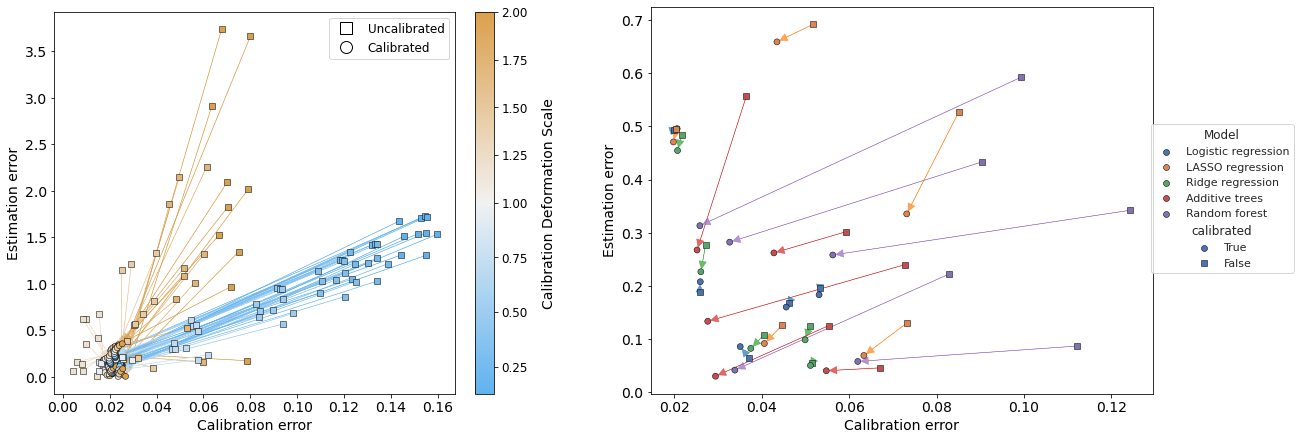

In [13]:
model_color_map = {
    "Logistic regression": "C0",
    "LASSO regression": "C1",
    "Ridge regression": "C2",
    "Additive trees": "C3",  # "Gradient boosting trees",
    "Random forest": "C4",
}
acic["color"] = [model_color_map[m] for m in acic["model"]]
plot_arrows(acic, ax)
fig

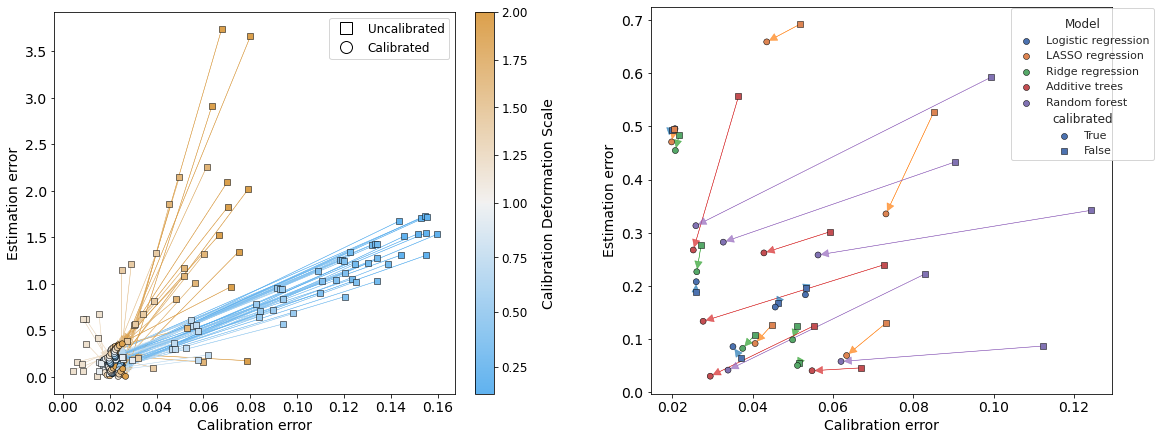

In [14]:
move_legend_fig_to_ax(subfigs[1], ax, "right", bbox_to_anchor=(1.1, 0.8))
fig

In [16]:
fig.savefig("figure_1.png")
fig.savefig("figure_1.svg")
fig.savefig("figure_1.pdf")

In [15]:
# TODO: a seaborn objects Arrow inhereting from Line, 
# having x, y, head/tail (i.e. head and tails are two different lines in the long-format)